### Task 2: Exploratory Data Analysis (EDA)

1. **Overview of the Data:**
   - Understand the structure of the dataset, including the number of rows, columns, and data types.

2. **Summary Statistics:**
   - Understand the central tendency, dispersion, and shape of the dataset’s distribution.

3. **Distribution of Numerical Features:**
   - Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

4. **Distribution of Categorical Features:**
   - Analyze the distribution of categorical features to gain insights into the frequency and variability of categories.

5. **Correlation Analysis:**
   - Understand the relationship between numerical features.

6. **Identifying Missing Values:**
   - Identify missing values to determine missing data and decide on appropriate imputation strategies.

7. **Outlier Detection:**
   - Use box plots to identify outliers.


In [2]:
import os , sys
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl
from scripts.Eda import data_overview, summary_statistics,identify_missing_values, distribution_of_numerical_features, correlation_analysis,distribution_of_categorical_features

2025-03-07 13:14:58,431 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data
2025-03-07 13:14:58,432 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\src\../logs


In [3]:
#import data
data = dl.load_data("data.csv")

2025-03-07 13:15:27,054 - INFO - Attempting to load data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv
2025-03-07 13:15:27,480 - INFO - Successfully loaded data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv


In [4]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data_overview(data)

Number of rows and columns: (95662, 16)
Column names and data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


The dataset has 95,662 transactions and 16 features, with 5 numerical and 11 categorical columns.

##2.	Summary Statistics

In [6]:
summary_statistics(data)

Summary statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


Insight: CountryCode is constant, Amount and Value are skewed with large outliers, and FraudResult is highly imbalanced (mean 0.002)

In [7]:
identify_missing_values(data)

No missing values found.


Insight: No missing values, simplifying preprocessing.

#3.	Distribution of Numerical Features

2025-03-07 13:15:27,772 - INFO - Starting distribution analysis of numerical features
2025-03-07 13:15:27,777 - INFO - Identified 5 numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
2025-03-07 13:15:27,779 - INFO - Generating histograms


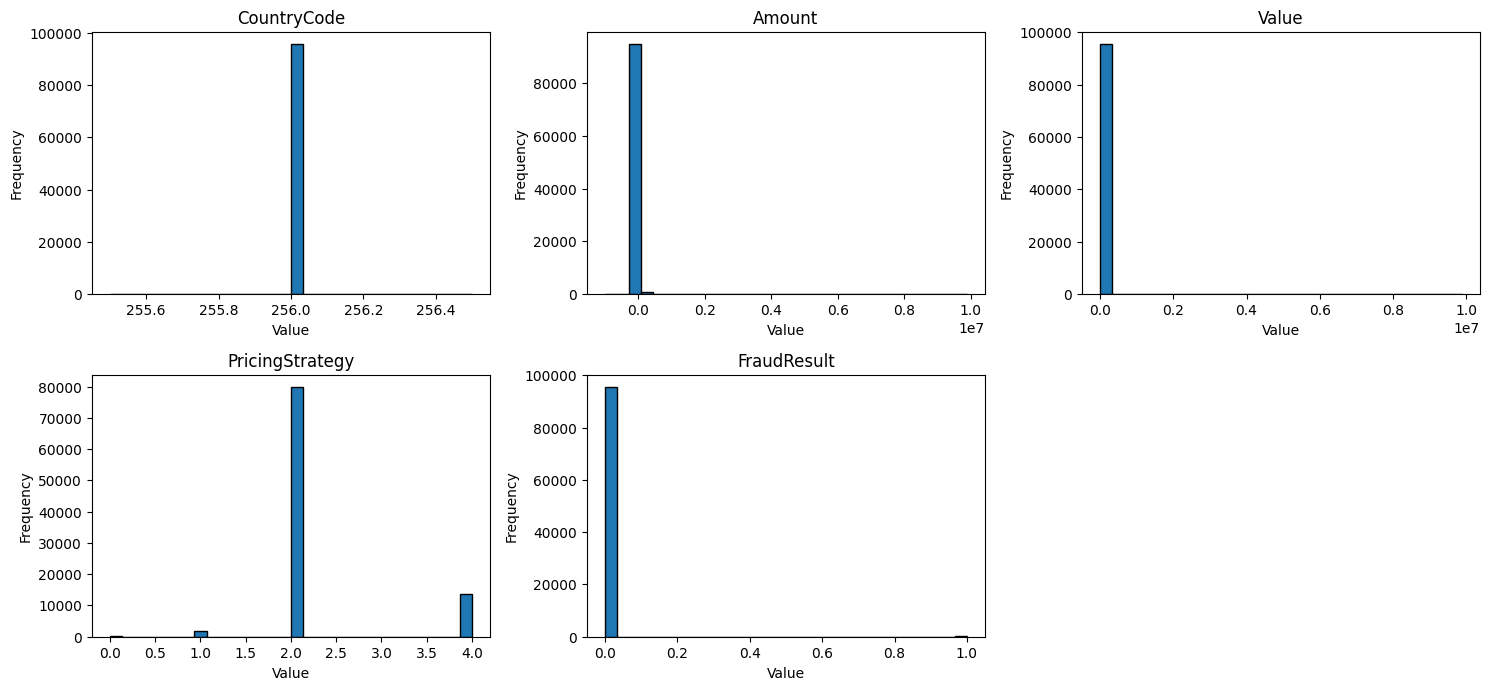

2025-03-07 13:15:29,074 - INFO - Generating box plots for outlier detection


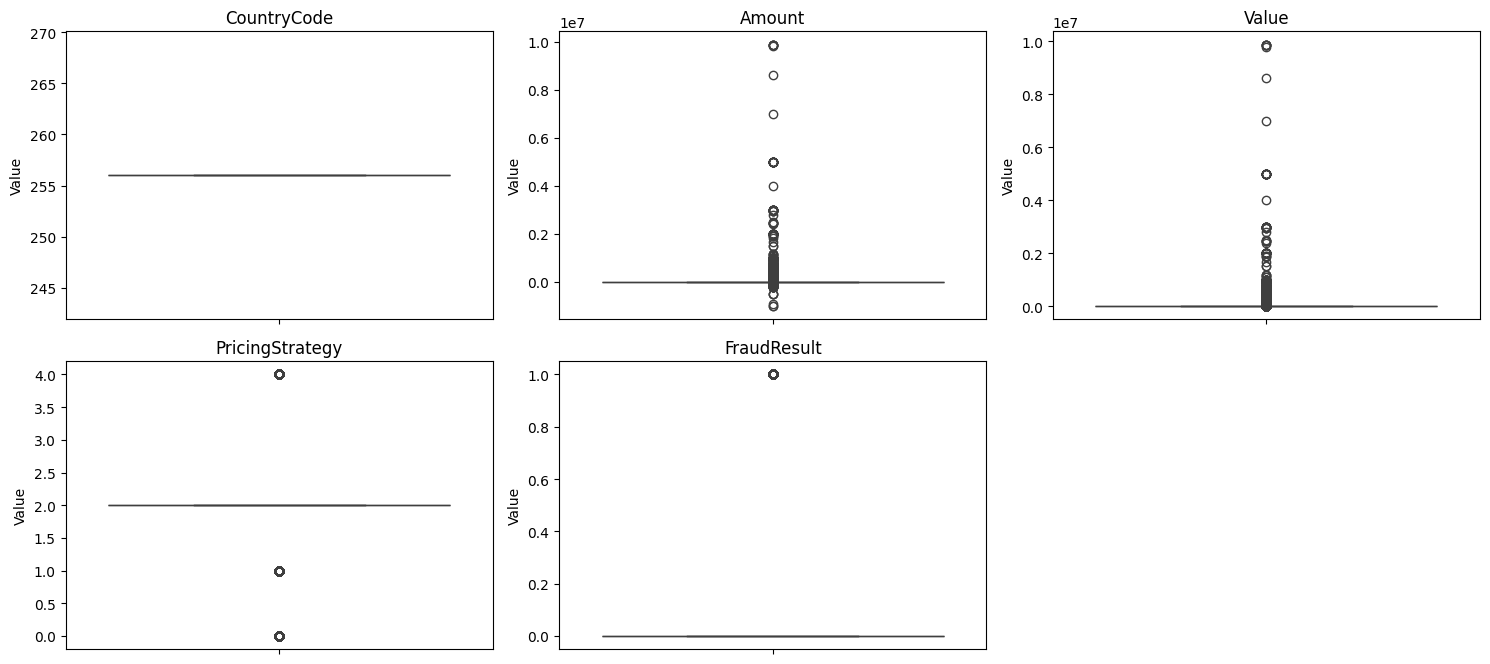

2025-03-07 13:15:30,798 - INFO - Generating pair plots for multivariate analysis


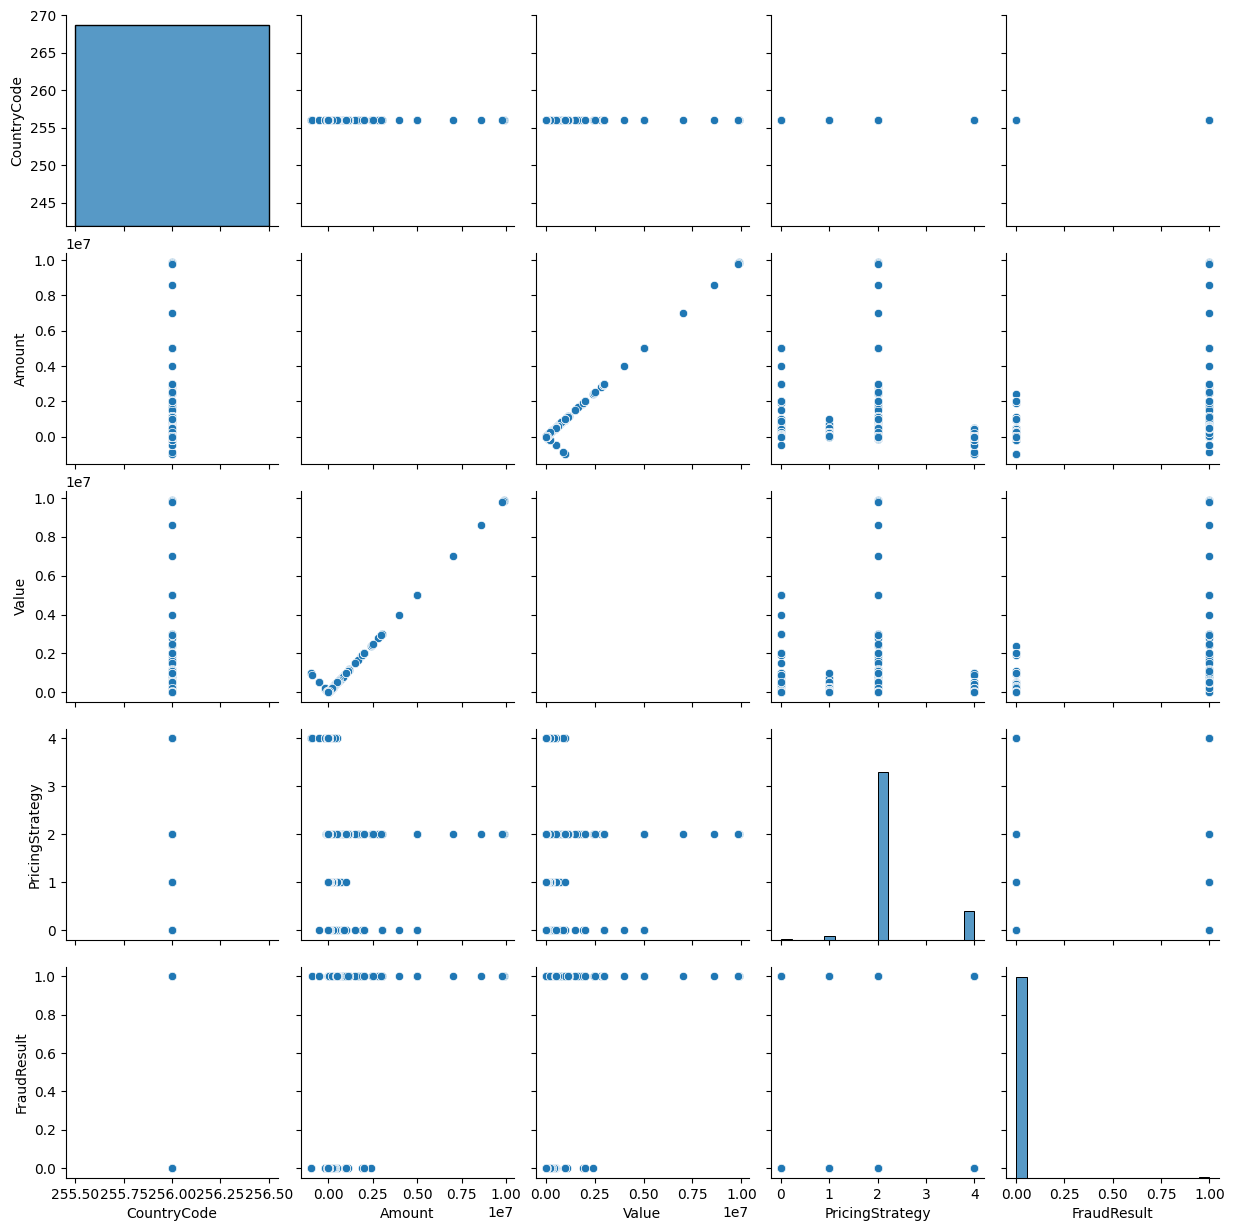

2025-03-07 13:19:47,881 - INFO - Checking for skewness
Skewness for Numerical Features:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


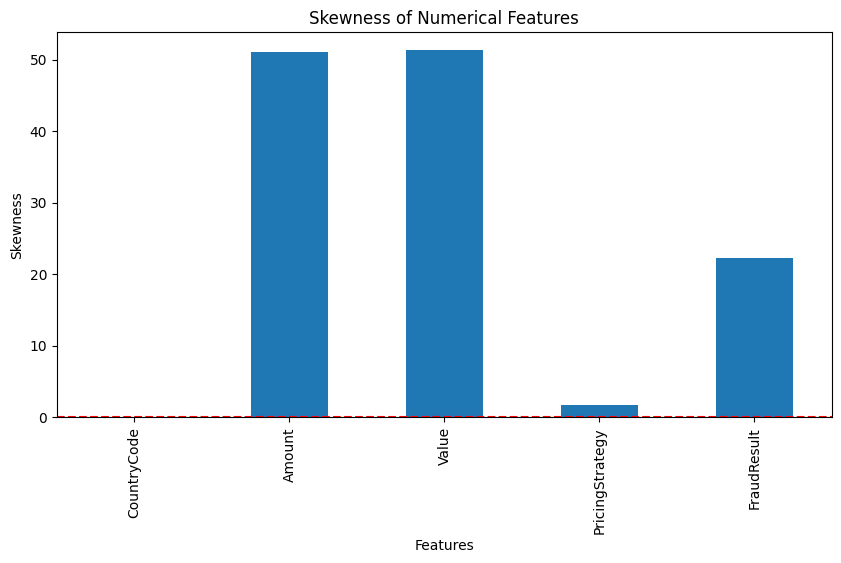

2025-03-07 13:19:48,233 - INFO - Distribution analysis completed


In [8]:
distribution_of_numerical_features(data)

## Key Insights from Data Analysis

### CountryCode
- All transactions are from a single country.

### Amount and Value
- Most transactions are of small amounts and values, with a few large transactions creating a long tail.
- These features have a skewed distribution with significant outliers.

### PricingStrategy
- Pricing strategy 2 is the most common, with other strategies used less frequently.
- It has specific, recurring values without outliers.

### FraudResult
- The binary nature of this feature indicates that fraud detection is a rare event, with most transactions being non-fraudulent.

### Correlation Between Amount and Value
- The strong linear relationship between `Amount` and `Value` suggests that these two variables are closely related.

### Distinct Pricing Strategies
- The clusters in the `PricingStrategy` variable indicate specific, well-defined strategies that do not show strong correlations with other variables.

### Binary Nature of FraudResult
- The `FraudResult` variable is binary with very few fraudulent transactions.


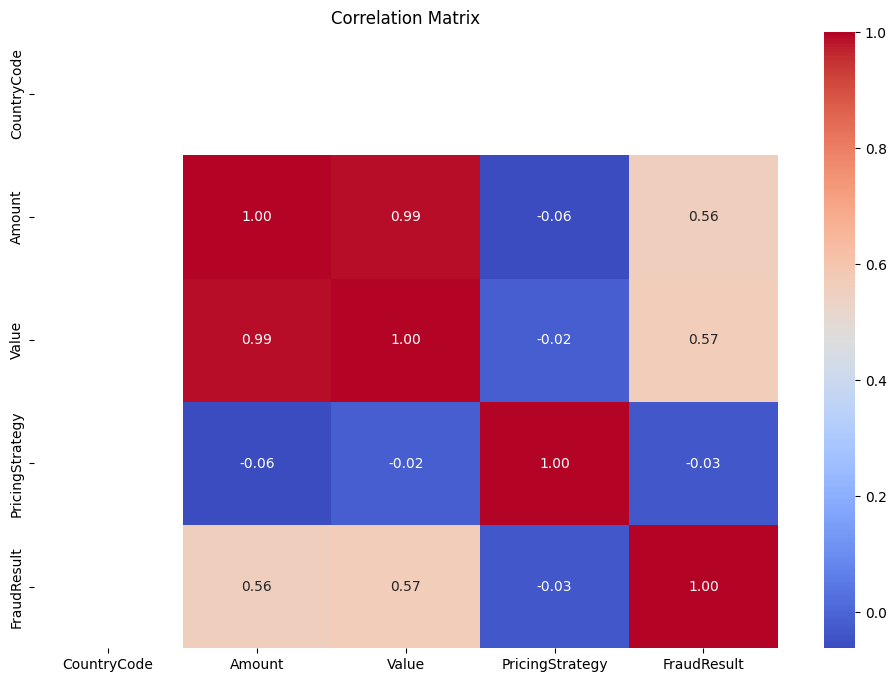

In [9]:
correlation_analysis(data)

Insight: Strong correlation (0.99) between Amount and Value; weak correlation between FraudResult and other features.

In [ ]:
distribution_of_categorical_features(data)

2025-03-07 13:19:48,627 - INFO - Starting distribution analysis of categorical features
2025-03-07 13:19:48,650 - INFO - Identified 11 categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


Insight: CurrencyCode and CountryCode are constant; ProductCategory and ChannelId show variability.